<a href="https://colab.research.google.com/github/Piroon1123/choikeonwoo/blob/main/AI_06_%EC%B5%9C%EA%B1%B4%EC%9A%B0_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project I - 머신러닝을 활용한 대출심사 모델**


#### 프로젝트 목표
1. Train 데이터를 바탕으로 Test 데이터의 대출상환여부(Default) 예측하는 모델 구축

2. 적합한 대출을 위한 변수 중요도 파악

3. 변수를 기반으로 적정 대출금 산출



### **0. 데이터 불러오기**

In [ ]:
# 0-1 구글 드라이브 연동

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 0-2 데이터 불러오기

import pandas as pd

dftest_url = '/content/drive/MyDrive/Colab Notebooks/ltv_1.csv'
dftrain_url = '/content/drive/MyDrive/Colab Notebooks/ltv_2.csv'

In [ ]:
df_train = pd.read_csv(dftrain_url, delimiter=',', encoding= 'latin-1')
df_test = pd.read_csv(dftest_url, delimiter=',', encoding= 'latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,18,19,20,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 0-3 df1 데이터 확인하기 (train 데이터)

df_train

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Client_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790.0,5102.0,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,NaN,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121850,12207714,29250.0,0.0,0.0,NaN,1.0,0.0,107820.00,3165.30,Relative,Service,Secondary,M,Female,CL,Home,0.031329,12889.0,2863.0,2661,2943,NaN,1,0,0,Laborers,2.0,2.0,4.0,16.0,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121851,12173765,15750.0,0.0,1.0,1.0,0.0,0.0,104256.00,3388.05,Alone,Commercial,Graduation,M,Female,CL,Home,0.018209,8648.0,636.0,902,1209,NaN,1,1,0,Sales,2.0,3.0,4.0,12.0,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121852,12103937,8100.0,0.0,1.0,0.0,1.0,1.0,55107.90,2989.35,Alone,Govt Job,Secondary,M,Male,CL,Home,0.008068,9152.0,1623.0,3980,353,NaN,1,0,0,High skill tech,3.0,3.0,5.0,11.0,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121853,12170623,38250.0,1.0,1.0,0.0,1.0,0.0,45000.00,2719.35,Alone,Service,Graduation,M,Female,CL,Home,0.028663,10290.0,847.0,895,2902,4.0,1,0,0,Sales,2.0,2.0,1.0,12.0,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.0774985,0.0979,0.0,2.0,0


In [ ]:
# 0-4 df2 데이터 확인하기 (test 데이터)

df_test

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Client_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250.0,0.0,1.0,1.0,1.0,0.0,112500.00,4474.80,Relative,Service,NaN,M,Male,CL,Home,0.019101,20063.0,2523,2318,3318,NaN,1,0,0,NaN,NaN,2.0,4.0,16.0,Yes,Yes,Self-employed,NaN,0.757151,0.629674,0.0515,716.0,2.0
1,12279381,13500.0,1.0,1.0,1.0,1.0,3.0,49752.00,3252.15,Alone,Service,Secondary,M,Female,CL,Home,0.0105,13200.0,551,6972,3865,6.0,1,1,0,Laborers,5.0,3.0,3.0,18.0,No,Yes,Self-employed,NaN,0.342269,NaN,NaN,181.0,NaN
2,12222714,38250.0,0.0,1.0,0.0,1.0,0.0,67500.00,3375.00,Alone,Commercial,Graduation,M,Female,RL,Home,0.032561,15943.0,1319,981,2296,NaN,1,0,1,Managers,2.0,1.0,2.0,19.0,Yes,Yes,Business Entity Type 3,NaN,0.683665,NaN,0.1503,281.0,NaN
3,12265215,20250.0,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Alone,Govt Job,Secondary,S,Male,CL,NaN,0.01452,15634.0,1510,4975,6121,NaN,1,1,1,NaN,1.0,2.0,6.0,20.0,No,No,Medicine,0.351581,0.22995,0.672243,NaN,1442.0,4.0
4,12203970,13500.0,1.0,1.0,0.0,1.0,0.0,43603.20,2515.95,Alone,Service,Secondary,M,Female,CL,Home,0.008625,15811.0,1075,5478,3618,7.0,1,0,0,Managers,2.0,2.0,1.0,13.0,Yes,Yes,Self-employed,0.731110,0.566971,0.730987,NaN,927.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80895,12210181,11700.0,0.0,0.0,0.0,1.0,2.0,107820.00,3152.25,Alone,NaN,Secondary,M,Male,CL,Home,0.00963,13867.0,1165,5970,3276,NaN,1,1,1,Core,4.0,2.0,2.0,9.0,Yes,No,Self-employed,0.495015,0.599436,0.276440695,NaN,537.0,1.0
80896,12206257,29250.0,0.0,1.0,1.0,1.0,2.0,116430.75,4630.50,Alone,Govt Job,Graduation,M,Male,NaN,Home,0.04622,14020.0,1699,NaN,5219,NaN,1,0,1,Core,4.0,1.0,6.0,15.0,Yes,Yes,Kindergarten,0.803057,NaN,0.680138822,0.1072,316.0,0.0
80897,12200446,54000.0,1.0,0.0,1.0,1.0,0.0,52128.00,2742.30,Alone,Service,Secondary,M,Female,CL,Home,0.030755,9954.0,796,4394,722,19.0,1,0,0,Laborers,2.0,2.0,3.0,14.0,Yes,No,Self-employed,NaN,0.403059,0.215182404,NaN,426.0,0.0
80898,12244943,13500.0,0.0,0.0,1.0,0.0,0.0,25470.00,1435.05,Alone,Service,Graduation,M,Female,CL,NaN,0.014464,21464.0,2335,7722,2637,NaN,1,0,0,Laborers,2.0,2.0,6.0,5.0,Yes,Yes,Industry: type 9,NaN,0.236402,0.579727423,0.1392,1186.0,2.0


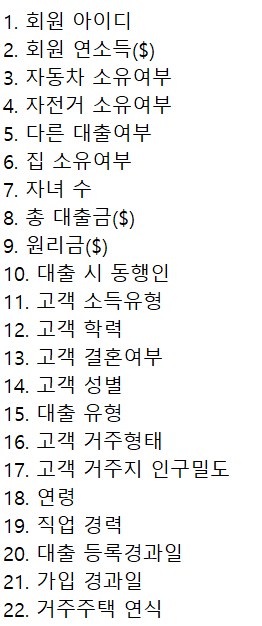

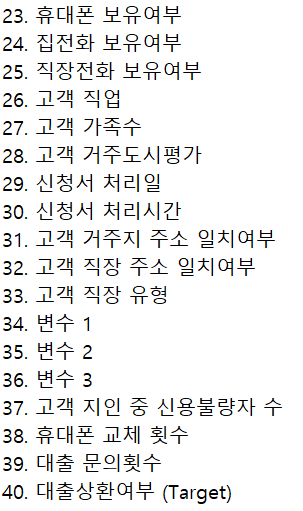

### **I. 데이터 전처리**

#### i) df_train 전처리

In [ ]:
# 1-1-1 df_train 데이터 결측값 확인

a1 = pd.DataFrame(df_train.isnull().sum(), columns=['결측치 갯수'])
a1

,결측치 갯수
ID,0
Client_Income,3622
Car_Owned,3581
Bike_Owned,3624
Active_Loan,3635
House_Own,3661
Child_Count,3638
Credit_Amount,3637
Loan_Annuity,4826
Accompany_Client,1746


In [ ]:
# 1-1-2 df_train 결측값 제거 (1) --> 결측값 너무 많은 항목 제거 (5,000개 이상)

df_train1 = df_train.drop(columns = ['ID_Days', 'Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Credit_Bureau'])

In [ ]:
# 1-1-3 df_train 결측값 제거 (2) --> 다른 항목과 의미가 겹치거나, 중요도가 떨어지는 항목 제거

df_train2 = df_train1.drop(columns = ['ID', 'Accompany_Client', 'Mobile_Tag', 'Population_Region_Relative', 'Registration_Days', 'Client_Gender', 'Client_Marital_Status', 'Application_Process_Hour', 'Phone_Change'])

In [ ]:
# 1-1-4 df_train 결측값 제거 (3) --> 0으로 채우기 (자동차, 자전거, 집, 아이 항목은 소유 여부가 불분명한 경우, 없다고 가정 = 0)

df_train2['Car_Owned'] = df_train2['Car_Owned'].fillna(0)
df_train2['Bike_Owned'] = df_train2['Bike_Owned'].fillna(0)
df_train2['House_Own'] = df_train2['House_Own'].fillna(0)
df_train2['Child_Count'] = df_train2['Child_Count'].fillna(0)

In [ ]:
# 1-1-4 df_train 결측값 제거 (3) --> 1로 채우기 (실제 대출 항목이 불분한 경우, 있다고 가정 = 1)

df_train2['Active_Loan'] = df_train2['Active_Loan'].fillna(1)

In [ ]:
# 1-1-5 df_train 결측값 제거 (4) --> 최빈값으로 채우기

df_train2['Client_Education'] = df_train2['Client_Education'].fillna('Secondary') # 학력이 불분명한 경우 중졸
df_train2['Loan_Contract_Type'] = df_train2['Loan_Contract_Type'].fillna('CL') # 대출이 불분명한 경우 CL (Cash Loan - 현금 대출)
df_train2['Client_City_Rating'] = df_train2['Client_City_Rating'].fillna(2) # 거주도시평가가 불분명한 경우 2점 (최하점)

In [ ]:
# 1-1-6 df_train 결측값 제거 (5) --> 특정값으로 채우기 

df_train2['Client_Income_Type'] = df_train2['Client_Income_Type'].fillna('Unknown') # 소득원천이 불분명할 경우, 그대로 불분명하다고 기입
df_train2['Client_Housing_Type'] = df_train2['Client_Housing_Type'].fillna('Unknown') # 거주형태가 불분명한 경우, 그대로 불분명하다고 기입

In [ ]:
# 1-1-7 결측값 확인 (2)

a2 = pd.DataFrame(df_train2.isnull().sum(), columns=['결측치 갯수'])
a2

,결측치 갯수
Client_Income,3622
Car_Owned,0
Bike_Owned,0
Active_Loan,0
House_Own,0
Child_Count,0
Credit_Amount,3637
Loan_Annuity,4826
Client_Income_Type,0
Client_Education,0


In [ ]:
# 1-1-7. 결측항 제거 --> 나머지 항목들은 값이 불분명한 경우, 함부로 임의의 값을 넣을 수 없음 => 결측값 있는 열을 제거

df_train3 = df_train2.dropna(axis=0)

In [ ]:
# 1-1-9 표 다듬기

df_train3 = df_train3.reset_index()
df_train4 = df_train3.drop(['index'], axis=1)

In [ ]:
# 1-1-10 결측값 최종확인 (결측값 없음)

a3 = pd.DataFrame(df_train4.isnull().sum(), columns=['결측치 갯수'])
a3

,결측치 갯수
Client_Income,0
Car_Owned,0
Bike_Owned,0
Active_Loan,0
House_Own,0
Child_Count,0
Credit_Amount,0
Loan_Annuity,0
Client_Income_Type,0
Client_Education,0


In [ ]:
# 1-1-11 직장유형 통일 -> 원활한 모델링을 위해 종류를 통일시켜줌

df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Business Entity Type 1' : 'Business Entity'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Business Entity Type 2' : 'Business Entity'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Business Entity Type 3' : 'Business Entity'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Trade: type 1' : 'Trade'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Trade: type 2' : 'Trade'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Trade: type 3' : 'Trade'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Trade: type 4' : 'Trade'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Trade: type 5' : 'Trade'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Trade: type 6' : 'Trade'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Trade: type 7' : 'Trade'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Transport: type 1' : 'Transport'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Transport: type 2' : 'Transport'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Transport: type 3' : 'Transport'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Transport: type 4' : 'Transport'})

In [ ]:
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 1' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 2' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 3' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 4' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 5' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 6' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 7' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 8' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 9' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 10' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 11' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 12' : 'Industry'})
df_train4['Type_Organization'] = df_train4['Type_Organization'].replace({'Industry: type 13' : 'Industry'})

In [ ]:
df_train4['Type_Organization'].value_counts()

Business Entity        26755
Self-employed          12000
Other                   5124
Industry                4461
Trade                   4456
Medicine                3549
Government              3265
Transport               2835
School                  2713
Kindergarten            2164
Construction            2155
Security                1047
Housing                  960
Military                 841
Bank                     828
Agriculture              822
Police                   750
Postal                   694
Security Ministries      614
Restaurant               584
Services                 472
University               458
Hotel                    322
Electricity              292
Telecom                  187
Emergency                175
Insurance                168
Advertising              130
Realtor                  122
Culture                  111
Cleaning                 104
Mobile                   100
Legal Services            94
Religion                  32
Name: Type_Org

In [ ]:
# 1-1-12 Age_Days를 나이로 환산

def toage(num):
  age = int(num) / 365
  age = int(age)
  return age

In [ ]:
df_train4['Age_Days'] = df_train4['Age_Days'].apply(toage)

#### ii) df_test 전처리 (df_train과 동일한 과정으로 전처리)

In [ ]:
# 1-2-1 df_test 데이터 결측값 확인

b1 = pd.DataFrame(df_test.isnull().sum(), columns=['결측치 갯수'])
b1

,결측치 갯수
ID,0
Client_Income,2451
Car_Owned,2405
Bike_Owned,2486
Active_Loan,2454
House_Own,2347
Child_Count,2328
Credit_Amount,2291
Loan_Annuity,3208
Accompany_Client,1208


In [ ]:
# 1-2-2 df_test 결측값 제거 (1)

df_test1 = df_test.drop(columns = ['ID_Days', 'Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Credit_Bureau'])

In [ ]:
# 1-2-3 df_test 결측값 제거 (2)

df_test2 = df_test1.drop(columns = ['ID', 'Accompany_Client', 'Mobile_Tag', 'Client_Gender', 'Population_Region_Relative', 'Registration_Days', 'Client_Marital_Status', 'Application_Process_Hour', 'Phone_Change'])

In [ ]:
# 1-2-4 df_test 결측값 제거 (3)

df_test2['Car_Owned'] = df_test2['Car_Owned'].fillna(0)
df_test2['Bike_Owned'] = df_test2['Bike_Owned'].fillna(0)
df_test2['House_Own'] = df_test2['House_Own'].fillna(0)
df_test2['Child_Count'] = df_test2['Child_Count'].fillna(0)

In [ ]:
# 1-2-4 df_test 결측값 제거 (3)

df_test2['Active_Loan'] = df_test2['Active_Loan'].fillna(1)

In [ ]:
# 1-2-5 df_test 결측값 제거 (4)

df_test2['Client_Education'] = df_test2['Client_Education'].fillna('Secondary') # 학력이 불분명한 경우 중졸
df_test2['Loan_Contract_Type'] = df_test2['Loan_Contract_Type'].fillna('CL') # 대출이 불분명한 경우 CL (Cash Loan - 현금 대출)
df_test2['Client_City_Rating'] = df_test2['Client_City_Rating'].fillna(2) # 거주도시평가 불분명한 경우 2점

In [ ]:
# 1-2-6 df_test 결측값 제거 (5) --> 특정값으로 채우기 

df_test2['Client_Income_Type'] = df_test2['Client_Income_Type'].fillna('Unknown')
df_test2['Client_Housing_Type'] = df_test2['Client_Housing_Type'].fillna('Unknown')

In [ ]:
# 1-2-7 df_test 결측값 확인 (2)

b2 = pd.DataFrame(df_test2.isnull().sum(), columns=['결측치 갯수'])
b2

,결측치 갯수
Client_Income,2451
Car_Owned,0
Bike_Owned,0
Active_Loan,0
House_Own,0
Child_Count,0
Credit_Amount,2291
Loan_Annuity,3208
Client_Income_Type,0
Client_Education,0


In [ ]:
# 1-2-8 df_test 결측항 제거

df_test3 = df_test2.dropna(axis=0)

In [ ]:
# 1-2-9 표 다듬기

df_test3 = df_test3.reset_index()
df_test4 = df_test3.drop(['index'], axis=1)

In [ ]:
# 1-2-10 결측값 최종확인 (결측값 없음)

b3 = pd.DataFrame(df_test4.isnull().sum(), columns=['결측치 갯수'])
b3

,결측치 갯수
Client_Income,0
Car_Owned,0
Bike_Owned,0
Active_Loan,0
House_Own,0
Child_Count,0
Credit_Amount,0
Loan_Annuity,0
Client_Income_Type,0
Client_Education,0


In [ ]:
# 1-2-11 직장유형 통일

df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Business Entity Type 1' : 'Business Entity'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Business Entity Type 2' : 'Business Entity'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Business Entity Type 3' : 'Business Entity'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Trade: type 1' : 'Trade'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Trade: type 2' : 'Trade'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Trade: type 3' : 'Trade'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Trade: type 4' : 'Trade'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Trade: type 5' : 'Trade'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Trade: type 6' : 'Trade'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Trade: type 7' : 'Trade'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Transport: type 1' : 'Transport'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Transport: type 2' : 'Transport'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Transport: type 3' : 'Transport'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Transport: type 4' : 'Transport'})

In [ ]:
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 1' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 2' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 3' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 4' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 5' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 6' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 7' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 8' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 9' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 10' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 11' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 12' : 'Industry'})
df_test4['Type_Organization'] = df_test4['Type_Organization'].replace({'Industry: type 13' : 'Industry'})

In [ ]:
df_test4['Type_Organization'].value_counts()

Business Entity        17675
Self-employed           7920
Other                   3468
Trade                   3003
Industry                2966
Medicine                2288
Government              2145
School                  1892
Transport               1868
Kindergarten            1474
Construction            1357
Security                 681
Housing                  598
Military                 557
Police                   552
Postal                   491
Agriculture              491
Bank                     490
Security Ministries      420
Restaurant               389
Services                 335
University               273
Electricity              184
Hotel                    180
Insurance                121
Telecom                  114
Emergency                111
Mobile                    84
Realtor                   82
Advertising               76
Culture                   75
Cleaning                  69
Legal Services            69
Religion                  14
Name: Type_Org

In [ ]:
# 1-2-12 Age_Days 나이로 바꿔주기

df_test4['Age_Days'] = df_test4['Age_Days'].apply(toage)

#### iii) 최종 데이터

In [ ]:
# 훈련(train) 최종 데이터

df_train4

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Loan_Contract_Type,Client_Housing_Type,Age_Days,Employed_Days,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,CL,Home,38,1062.0,1,0,2.0,2.0,6.0,Yes,Yes,Self-employed,0
1,20250.0,1.0,0.0,1.0,0.0,0.0,15282.00,1826.55,Service,Graduation,CL,Home,38,4129.0,0,1,2.0,2.0,3.0,Yes,Yes,Government,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Service,Graduation dropout,CL,Family,46,5102.0,0,0,2.0,2.0,4.0,Yes,Yes,Self-employed,0
3,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,Secondary,CL,Home,31,2977.0,0,0,4.0,1.0,3.0,Yes,Yes,Business Entity,0
4,11250.0,0.0,1.0,1.0,1.0,1.0,13752.00,653.85,Service,Secondary,CL,Home,38,1184.0,0,0,2.0,2.0,2.0,Yes,Yes,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79379,29250.0,0.0,0.0,1.0,1.0,0.0,107820.00,3165.30,Service,Secondary,CL,Home,35,2863.0,0,0,2.0,2.0,4.0,Yes,No,Business Entity,1
79380,15750.0,0.0,1.0,1.0,0.0,0.0,104256.00,3388.05,Commercial,Graduation,CL,Home,23,636.0,1,0,2.0,3.0,4.0,Yes,Yes,Self-employed,0
79381,8100.0,0.0,1.0,0.0,1.0,1.0,55107.90,2989.35,Govt Job,Secondary,CL,Home,25,1623.0,0,0,3.0,3.0,5.0,No,No,Trade,0
79382,38250.0,1.0,1.0,0.0,1.0,0.0,45000.00,2719.35,Service,Graduation,CL,Home,28,847.0,0,0,2.0,2.0,1.0,Yes,Yes,Business Entity,0


In [ ]:
# 테스트(test) 최종 데이터

df_test4

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Loan_Contract_Type,Client_Housing_Type,Age_Days,Employed_Days,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
0,13500.0,1.0,1.0,1.0,1.0,3.0,49752.00,3252.15,Service,Secondary,CL,Home,36,551,1,0,5.0,3.0,3.0,No,Yes,Self-employed
1,38250.0,0.0,1.0,0.0,1.0,0.0,67500.00,3375.00,Commercial,Graduation,RL,Home,43,1319,0,1,2.0,1.0,2.0,Yes,Yes,Business Entity
2,20250.0,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Govt Job,Secondary,CL,Unknown,42,1510,1,1,1.0,2.0,6.0,No,No,Medicine
3,13500.0,1.0,1.0,0.0,1.0,0.0,43603.20,2515.95,Service,Secondary,CL,Home,43,1075,0,0,2.0,2.0,1.0,Yes,Yes,Self-employed
4,11250.0,1.0,1.0,0.0,1.0,0.0,53366.85,2273.85,Govt Job,Secondary,CL,Home,47,2598,0,0,2.0,2.0,2.0,Yes,No,Security Ministries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52507,11700.0,0.0,0.0,0.0,1.0,2.0,107820.00,3152.25,Unknown,Secondary,CL,Home,37,1165,1,1,4.0,2.0,2.0,Yes,No,Self-employed
52508,29250.0,0.0,1.0,1.0,1.0,2.0,116430.75,4630.50,Govt Job,Graduation,CL,Home,38,1699,0,1,4.0,1.0,6.0,Yes,Yes,Kindergarten
52509,54000.0,1.0,0.0,1.0,1.0,0.0,52128.00,2742.30,Service,Secondary,CL,Home,27,796,0,0,2.0,2.0,3.0,Yes,No,Self-employed
52510,13500.0,0.0,0.0,1.0,0.0,0.0,25470.00,1435.05,Service,Graduation,CL,Unknown,58,2335,0,0,2.0,2.0,6.0,Yes,Yes,Industry


### **II. Encoding**

#### i) Onehot Encoding

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 403 kB/s 


In [ ]:
# 2-1-1 원핫인코딩 --> 데이터를 학습하기 위해, 문자열 항목들을 숫자로 변환

from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
train_encoded = encoder.fit_transform(df_train4)
test_encoded = encoder.fit_transform(df_test4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_encoded.head() # 훈련(train) 데이터 인코딩 확인

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Loan_Contract_Type,Client_Housing_Type,Age_Days,Employed_Days,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1,1,1,1,38,1062.0,1,0,2.0,2.0,6.0,1,1,1,0
1,20250.0,1.0,0.0,1.0,0.0,0.0,15282.00,1826.55,2,2,1,1,38,4129.0,0,1,2.0,2.0,3.0,1,1,2,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,2,3,1,2,46,5102.0,0,0,2.0,2.0,4.0,1,1,1,0
3,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,1,1,1,1,31,2977.0,0,0,4.0,1.0,3.0,1,1,3,0
4,11250.0,0.0,1.0,1.0,1.0,1.0,13752.00,653.85,2,1,1,1,38,1184.0,0,0,2.0,2.0,2.0,1,1,4,0


In [ ]:
test_encoded.head() # 테스트(test) 데이터 인코딩 확인

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Loan_Contract_Type,Client_Housing_Type,Age_Days,Employed_Days,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
0,13500.0,1.0,1.0,1.0,1.0,3.0,49752.00,3252.15,2,1.0,1,1,36,551,1,0,5.0,3.0,3.0,2,1,1
1,38250.0,0.0,1.0,0.0,1.0,0.0,67500.00,3375.00,1,2.0,2,1,43,1319,0,1,2.0,1.0,2.0,1,1,3
2,20250.0,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,3,1.0,1,4,42,1510,1,1,1.0,2.0,6.0,2,2,12
3,13500.0,1.0,1.0,0.0,1.0,0.0,43603.20,2515.95,2,1.0,1,1,43,1075,0,0,2.0,2.0,1.0,1,1,1
4,11250.0,1.0,1.0,0.0,1.0,0.0,53366.85,2273.85,3,1.0,1,1,47,2598,0,0,2.0,2.0,2.0,1,2,21


#### ii) Train / Val / Test 분리

In [ ]:
# 2-2-1 train / val 분리 --> test에 시험하기 전, train 성능을 시험할 데이터 분리

from sklearn.model_selection import train_test_split

train, val = train_test_split(train_encoded, test_size=0.15, random_state=1)

train.shape, val.shape

((67476, 23), (11908, 23))

In [ ]:
# 2-2-2 features와 target을 분리

target = 'Default'
features = train_encoded.drop(columns=[target]).columns

X_train = train[features]
X_val = val[features]
y_train = train[target]
y_val = val[target]

#### iii) StandardScaler

In [ ]:
# 2-3-1 표준화 --> 과적합(Overfit) 방지

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### **III. 모델링**

#### i) Baseline - Logistic Regression

In [ ]:
# 3-1-1 베이스라인 모델 구축 & 정확도

from sklearn.linear_model import LogisticRegression # 로지스틱 회귀모델 사용

logistic = LogisticRegression(max_iter=100)

logistic.fit(X_train_scaled, y_train)

a11 = logistic.score(X_val_scaled, y_val)
print('검증세트 정확도 : {}'.format(a11))

검증세트 정확도 : 0.9155189788377561


In [ ]:
# 3-1-2 베이스라인 모델 AUC 점수 --> 이진분류기 성능 평가

from sklearn.metrics import roc_auc_score

y_pred1 = logistic.predict_proba(X_val_scaled)[:,1]
auc1 = roc_auc_score(y_val, y_pred1)

print('베이스라인 AUC 점수 : ', auc1)

베이스라인 AUC 점수 :  0.6401428158256479


AUC 점수 평가

* 0.8 이상 - 훌륭한 모델
* 0.5 이상 0.8 미만 - 도움이 되는 모델 (●)
* 0.5 미만 - 의미가 없는 모델




In [ ]:
# 3-1-3 베이스라인 모델 F1 점수

from sklearn.metrics import f1_score

y_pred11 = logistic.predict(X_val_scaled)
f1_score1 = f1_score(y_val, y_pred11)

print('베이스라인 f1 점수 : ', f1_score1)

베이스라인 f1 점수 :  0.0


F1 점수 평가

*   정상대출 수에 비해 비정상 대출의 수가 압도적으로 적기 때문에, 정상 대출은 잘 탐지하지만 비정상대출에 대해서는 거의 탐지하지 못하는 것으로 보임


*   정상대출과 비정상대출의 표본 개수를 맞춰주는 작업이 필요함


In [ ]:
# 타겟 표본 갯수 맞추기 (1) - 개수 확인

train['Default'].value_counts()

0    61568
1     5908
Name: Default, dtype: int64

In [ ]:
# 타겟 표본 갯수 맞추기 (2) - 타겟 0인 표본 갯수 조정

n1 = train[train['Default'] == 0]
n11 = train.head(11000)

In [ ]:
n22 = train[train['Default'] == 1]

In [ ]:
n33 = pd.concat([n11, n22])
n33.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Loan_Contract_Type,Client_Housing_Type,Age_Days,Employed_Days,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
70262,18000.0,0.0,1.0,1.0,0.0,0.0,50692.5,5026.95,2,1,1,1,52,3090.0,0,1,2.0,2.0,6.0,1,1,26,0
23587,11250.0,0.0,0.0,1.0,1.0,0.0,18000.0,900.00,2,1,2,1,39,4170.0,0,0,1.0,3.0,5.0,1,1,3,0
62868,31500.0,1.0,0.0,0.0,0.0,0.0,156904.2,4587.75,1,2,1,1,36,4075.0,0,0,1.0,2.0,4.0,1,1,8,1
75775,18000.0,0.0,0.0,0.0,0.0,1.0,45000.0,2583.45,1,2,1,1,37,171.0,0,1,3.0,1.0,2.0,1,1,9,0
26872,9000.0,0.0,0.0,1.0,1.0,0.0,51353.1,2483.55,2,1,1,1,28,1572.0,0,0,2.0,2.0,2.0,1,2,1,0


In [ ]:
# 2-2-2 features와 target을 분리

target = 'Default'
features = train_encoded.drop(columns=[target]).columns

X1_train = n33[features]
X1_val = val[features]
y1_train = n33[target]
y1_val = val[target]

In [ ]:
# 2-3-1 표준화 --> 과적합(Overfit) 방지

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(X1_train)
X1_val_scaled = scaler.transform(X1_val)

In [ ]:
# 3-1-1 베이스라인 모델 구축 & 정확도

from sklearn.linear_model import LogisticRegression # 로지스틱 회귀모델 사용

logistic = LogisticRegression(max_iter=100)

logistic.fit(X1_train_scaled, y1_train)

a11 = logistic.score(X1_val_scaled, y1_val)
print('검증세트 정확도 : {}'.format(a11))

검증세트 정확도 : 0.7925764192139738


In [ ]:
# 3-1-2 베이스라인 모델 AUC 점수 --> 이진분류기 성능 평가

from sklearn.metrics import roc_auc_score

y_pred11 = logistic.predict_proba(X1_val_scaled)[:,1]
auc11 = roc_auc_score(y1_val, y_pred11)

print('베이스라인 AUC 점수 : ', auc11)

베이스라인 AUC 점수 :  0.639490246194818


In [ ]:
# 3-1-3 베이스라인 모델 F1 점수

from sklearn.metrics import f1_score

y_pred111 = logistic.predict(X1_val_scaled)
f1_score11 = f1_score(y1_val, y_pred111)

print('베이스라인 f1 점수 : ', f1_score11)

베이스라인 f1 점수 :  0.19961114711600778


표본 개수 조정 후 평가

*   전체적인 정확도는 떨어졌고 AUC 점수는 감소함

*   F1 점수가 0에서 소폭 상승했으나, 비정상대출에 대한 탐지 능력은 여전히 미미함 --> 비정상대출 표본이 매우 부족함

#### ii) RandomForest



In [ ]:
# 3-2-1 랜덤포레스트 모델 구축 & 정확도

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
    RandomForestClassifier(n_estimators=300, random_state=2)
)

pipe.fit(X1_train_scaled, y1_train)
a1 = pipe.score(X1_val_scaled, y1_val)
print('RandomForest 검증세트 정확도 : {}'.format(a1))

RandomForest 검증세트 정확도 : 0.836496472959355


n_estimator : 생성할 의사결정 나무 갯수

*   갯수를 높게 설정 할수록 정확도 상승 
*   그러나 연산시간도 증가
*   (50부터 300까지 캡처할 것)





In [ ]:
# 3-2-2 랜덤포레스트 모델 AUC 점수

y_pred22 = pipe.predict_proba(X1_val_scaled)[:,1]
auc22 = roc_auc_score(y1_val, y_pred22)

print('RandomForest AUC 점수 : ', auc22)

RandomForest AUC 점수 :  0.7043422823907775


AUC 점수 평가

* 0.8 이상 - 훌륭한 모델 
* 0.5 이상 0.8 미만 - 도움이 되는 모델 (●)
* 0.5 미만 - 의미가 없는 모델

In [ ]:
# 3-2-3 랜덤포레스트 모델 F1 점수

from sklearn.metrics import f1_score

y_pred222 = pipe.predict(X1_val_scaled)
f1_score22 = f1_score(y1_val, y_pred222)
print('RandomForest f1 점수 : ', f1_score22)

RandomForest f1 점수 :  0.2796892341842397




*   베이스라인 모델보다 정확도, AUC 점수, F1 점수가 상승하였음

*   F1 점수가 여전히 낮은것을 보아, 비정상대출을 잘 감지하지 못하는 것으로 보임



#### iii) XGBoost

In [ ]:
# 3-3-1 XGBoost 모델 구축 & 정확도

import xgboost
from xgboost import XGBClassifier

xgb = xgboost.XGBClassifier(n_estimators=300
                              , random_state=2
                              , n_jobs=-1
                              , max_depth=15
                              , learning_rate=0.2
                              )

xgb.fit(X1_train_scaled, y1_train)
a13 = xgb.score(X1_val_scaled, y1_val)

print('XGBoost 검증 세트 정확도 : ', a13)

XGBoost 검증 세트 정확도 :  0.7744373530399731


In [ ]:
# 3-3-2 XGBoost AUC 점수

from sklearn.metrics import roc_auc_score

y_pred33 = xgb.predict(X1_val_scaled)
auc33 = roc_auc_score(y_pred33, y1_val)
print('XGBoost AUC 점수 : ',auc33)

XGBoost AUC 점수 :  0.5593035197676473


AUC 점수 평가

* 0.8 이상 - 훌륭한 모델 
* 0.5 이상 0.8 미만 - 도움이 되는 모델 (●)
* 0.5 미만 - 의미가 없는 모델

In [ ]:
# 3-3-3 XGBoost F1 점수

from sklearn.metrics import f1_score

y_pred333 = xgb.predict(X1_val_scaled)
f1_score33 = f1_score(y1_val, y_pred333)
print('XGBoost f1 점수 : ', f1_score33)

XGBoost f1 점수 :  0.25554323725055433




*   랜덤포레스트 모델보다 정확도, AUC 점수, F1 점수가 하락함

*   XGBoost는 Gradient Boosting 알고리즘을 분산(병렬)환경에서도 실행할 수 있도록 구현해놓은 라이브러리로서 데이터의 용량이 클 때는 성능과 효율이 좋지만, 현재 데이터는 그렇게 크지 않은 것으로 보임


### **IV. 최종모델 해석 (RandomForest)**

i) 모델 평가



*   비정상거래의 표본이 너무 부족함 -> 거의 다 정상거래로 분류해버림

*   정확도는 높게 나오지만, 비정상거래를 탐지하는 모델로는 무리가 있음

*   따라서, 정상거래 데이터만 모아서 머신러닝을 통해 적정대출가격을 산출할 예정





In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.2 MB/s 


In [ ]:
# 4-2-1 변수중요도 산출하기
import eli5
from eli5.sklearn import PermutationImportance

pipe.named_steps

{'randomforestclassifier': RandomForestClassifier(n_estimators=300, random_state=2)}

In [ ]:
permuter = PermutationImportance(
    pipe.named_steps['randomforestclassifier'],
    scoring='accuracy', 
    n_iter=5,
    random_state=2
)

permuter.fit(X1_train_scaled, y1_train)

PermutationImportance(estimator=RandomForestClassifier(n_estimators=300,
                                                       random_state=2),
                      random_state=2, scoring='accuracy')

In [ ]:
feature_names = features.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Child_Count                   0.000083
Active_Loan                   0.000225
House_Own                     0.000260
Bike_Owned                    0.000331
Homephone_Tag                 0.000390
Client_Contact_Work_Tag       0.000473
Client_Family_Members         0.000591
Client_Permanent_Match_Tag    0.001751
Workphone_Working             0.001833
Car_Owned                     0.002590
Client_Housing_Type           0.003064
Client_Income_Type            0.003217
Application_Process_Day       0.006340
Loan_Contract_Type            0.012124
Client_Income                 0.023208
Type_Organization             0.024616
Loan_Annuity                  0.036669
Client_City_Rating            0.037391
Credit_Amount                 0.073362
Age_Days                      0.083937
Client_Education              0.087497
Employed_Days                 0.152330
dtype: float64

In [ ]:
# 4-2-2 변수중요도 시각화

eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1523 ± 0.0036,Employed_Days
0.0875 ± 0.0031,Client_Education
0.0839 ± 0.0041,Age_Days
0.0734 ± 0.0017,Credit_Amount
0.0374 ± 0.0014,Client_City_Rating
0.0367 ± 0.0014,Loan_Annuity
0.0246 ± 0.0014,Type_Organization
0.0232 ± 0.0013,Client_Income
0.0121 ± 0.0011,Loan_Contract_Type
0.0063 ± 0.0008,Application_Process_Day


대출평가 중요한 변수 Top 8

1.   경력
2.   학력
3.   나이
4.   총 대출금
5.  거주 도시 수준
6. 원리금
7. 직장 유형
8. 총소득





### V. 머신러닝을 통한 적정대출 예측

i) 데이터 불러오기 및 전처리

In [ ]:
df_tr = train_encoded[train_encoded['Default'] == 0] # 정상대출만을 이용해서 원하는 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split

train01, val01 = train_test_split(df_tr, test_size=0.15, random_state=1)

train01.shape, val01.shape

((61599, 23), (10871, 23))

In [ ]:
# 5-1-1 features와 target을 분리

target = 'Credit_Amount' # 총 대출금
features = train_encoded.drop(columns=[target]).columns

X2_train = train01[features].to_numpy()
y2_train = train01[target]
X2_test = val01[features].to_numpy()
y2_test = val01[target]

ii) 학습 및 평가

In [ ]:
# 5-2-1 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)

model.fit(X2_train, y2_train)

LinearRegression(n_jobs=-1)

In [ ]:
# 5-2-2 모델 성능

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = model.predict(X2_test)
mse = mean_squared_error(y2_test, y_pred)
rmse = mse ** (0.5)
mae = mean_absolute_error(y2_test, y_pred)
r2 = r2_score(y2_test, y_pred)

print('rmse : ', rmse)
print('mae : ', mae)
print('r2 : ', r2)

rmse :  26195.610520858983
mae :  18822.702894331644
r2 :  0.5936953977673707


In [ ]:
# 5-2-3 예측값과 실제값 비교

y_pred = model.predict(X2_test)
a11 = pd.DataFrame(y_pred)
a11.columns = ['Predict']
a22 = pd.DataFrame(y2_test)

In [ ]:
a222 = a22.reset_index()
a022 = a222.drop(columns=['index'])

In [ ]:
res = pd.concat([a11, a022], axis = 1)
res.head(20)

,Predict,Credit_Amount
0,13065.645912,6750.0
1,65596.946133,54734.4
2,61501.024178,53910.0
3,76165.165979,112500.0
4,58841.668811,25470.0
5,28078.776849,26955.0
6,107046.570063,45000.0
7,100193.294730,148283.1
8,121936.390290,82454.4
9,54392.669541,63448.2


In [ ]:
res.tail(20)

,Predict,Credit_Amount
10851,85422.685470,77029.20
10852,77725.837730,75519.00
10853,118796.530710,49752.00
10854,8748.998688,18000.00
10855,42956.142787,41400.00
10856,42602.662466,23889.60
10857,82332.049507,38848.50
10858,110012.722507,180000.00
10859,91755.349498,63900.00
10860,63388.854160,64008.00
